In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import pylab

In [2]:
# read HR-Employee-Attrition file
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.tsv.txt", sep='\t')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# drop the columns not required and create new Data set
to_drop = ['BusinessTravel', 'DailyRate', 'DistanceFromHome','EmployeeCount',
          'EmployeeNumber', 'JobLevel', 'MonthlyIncome','MonthlyRate',
          'NumCompaniesWorked', 'Over18','PercentSalaryHike', 'PerformanceRating',
          'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
          'YearsInCurrentRole']
cdf = df.drop(to_drop, axis = 1)
cdf



,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,Yes,8,1,6,0,5
1,49,No,Research & Development,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,No,10,3,10,1,7
2,37,Yes,Research & Development,2,Other,4,Male,92,2,Laboratory Technician,3,Single,Yes,7,3,0,0,0
3,33,No,Research & Development,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,Yes,8,3,8,3,0
4,27,No,Research & Development,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,No,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2,Medical,3,Male,41,4,Laboratory Technician,4,Married,No,17,3,5,0,3
1466,39,No,Research & Development,1,Medical,4,Male,42,2,Healthcare Representative,1,Married,No,9,3,7,1,7
1467,27,No,Research & Development,3,Life Sciences,2,Male,87,4,Manufacturing Director,2,Married,Yes,6,3,6,0,3
1468,49,No,Sales,3,Medical,4,Male,63,2,Sales Executive,2,Married,No,17,2,9,0,8


<AxesSubplot:ylabel='count'>

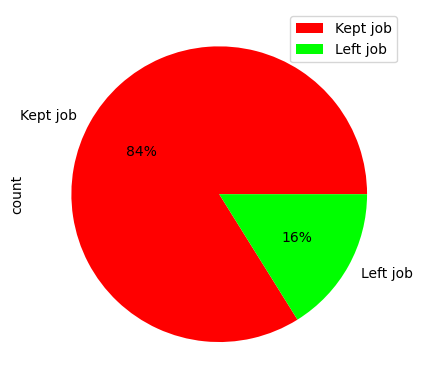

In [4]:
#total of all who have attrited

all_att = df.groupby('Attrition').Gender.count()


total_df = pd.DataFrame({"count": all_att})
total_df = total_df.reset_index()

#pie chart for total Attrition

labels = ["Kept job", "Left job"]





colors = ["red", "lime"]

attrition_pie= total_df.plot(kind = 'pie', 
           y = "count", 
           autopct = '%1.0f%%', 
           labels = labels,
           colors = colors, 
           startangle = 0)

attrition_pie

In [5]:
#count number of people in each JobRole

dep_df = df.groupby(["JobRole","Attrition"]).Attrition.count()
dep_df = pd.DataFrame({'Count':dep_df})

dep_df = dep_df.reset_index()


dep_df

,JobRole,Attrition,Count
0,Healthcare Representative,No,122
1,Healthcare Representative,Yes,9
2,Human Resources,No,40
3,Human Resources,Yes,12
4,Laboratory Technician,No,197
5,Laboratory Technician,Yes,62
6,Manager,No,97
7,Manager,Yes,5
8,Manufacturing Director,No,135
9,Manufacturing Director,Yes,10


In [6]:
#take out JobRole portion and make it into a list
x_job = dep_df["JobRole"]
x_job = x_job.drop_duplicates()
x_job = x_job.tolist()
x_job

['Healthcare Representative',
 'Human Resources',
 'Laboratory Technician',
 'Manager',
 'Manufacturing Director',
 'Research Director',
 'Research Scientist',
 'Sales Executive',
 'Sales Representative']

In [7]:
#take out the counts for "No" values and make it into a list

y_no =dep_df[dep_df['Attrition'].str.contains('No')]
y_no = y_no["Count"]


y_no = y_no.tolist()
y_no

[122, 40, 197, 97, 135, 78, 245, 269, 50]

In [8]:
#take out the counts for "Yes" values and make it into a list

y_yes =dep_df[dep_df['Attrition'].str.contains('Yes')]
y_yes = y_yes["Count"]

y_yes = y_yes.tolist()
y_yes

[9, 12, 62, 5, 10, 2, 47, 57, 33]

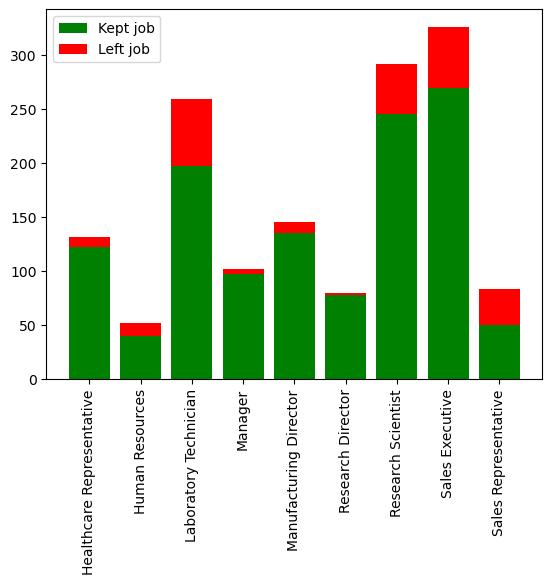

In [9]:
#make a stacked bar graph, with no values on bottom, and yes values on top

plt.bar(x_job, y_no, color='green')
plt.bar(x_job, y_yes, bottom=y_no, color='red',)
plt.xticks(rotation = 'vertical')

labels = ["Kept job", "Left job"]
plt.legend(labels)

plt.show()

In [10]:
#Count by  Marital Status 

mar_df = cdf.groupby(["MaritalStatus", "Attrition"]).Attrition.count()

mar_df = pd.DataFrame({"Count": mar_df})

mar_df = mar_df.reset_index()

mar_df

,MaritalStatus,Attrition,Count
0,Divorced,No,294
1,Divorced,Yes,33
2,Married,No,589
3,Married,Yes,84
4,Single,No,350
5,Single,Yes,120


In [11]:
#make Marital Status into a list

mar_list = mar_df["MaritalStatus"]



mar_list = mar_list.drop_duplicates()
mar_list = mar_list.tolist()
mar_list  

['Divorced', 'Married', 'Single']

In [12]:
#make count of No Attrition into a list

mar_no = mar_df[mar_df['Attrition'].str.contains('No')]
mar_no = mar_no['Count']
mar_no = mar_no.tolist()
mar_no

[294, 589, 350]

In [13]:
#make count of Yes Attrition into a list

mar_yes = mar_df[mar_df['Attrition'].str.contains('Yes')]
mar_yes = mar_yes['Count']
mar_yes = mar_yes.tolist()
mar_yes

[33, 84, 120]

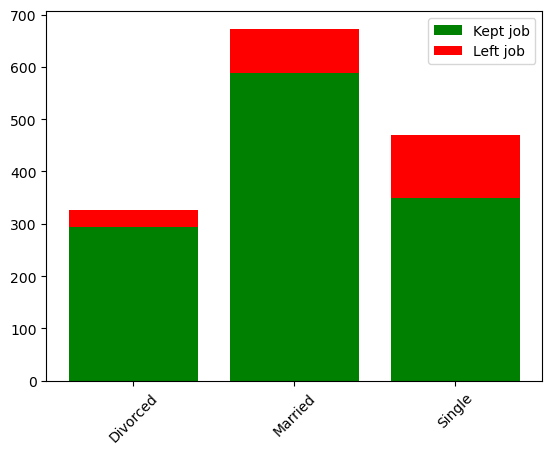

In [14]:
#stacked bar graph based on marital status and attrition rate

plt.bar(mar_list, mar_no, color='green')
plt.bar(mar_list, mar_yes, bottom=mar_no, color='red',)
plt.xticks(rotation = 45)


labels = ["Kept job", "Left job"]
plt.legend(labels)

plt.show()


In [69]:
cdf = cdf.drop("Age groups", axis = 1)

In [70]:
#make bins of ages and then use pd.cut to add to data frame



age_bins = [0, 30, 40, 50, 60]

labels = ["<30", "31 - 40", "41 - 49", "51-60"]



cdf["Age_groups"] = pd.cut(cdf["Age"], bins = age_bins, labels = labels)
cdf

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Age_groups
0,41,Yes,Sales,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,Yes,8,1,6,0,5,41 - 49
1,49,No,Research & Development,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,No,10,3,10,1,7,41 - 49
2,37,Yes,Research & Development,2,Other,4,Male,92,2,Laboratory Technician,3,Single,Yes,7,3,0,0,0,31 - 40
3,33,No,Research & Development,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,Yes,8,3,8,3,0,31 - 40
4,27,No,Research & Development,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,No,6,3,2,2,2,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2,Medical,3,Male,41,4,Laboratory Technician,4,Married,No,17,3,5,0,3,31 - 40
1466,39,No,Research & Development,1,Medical,4,Male,42,2,Healthcare Representative,1,Married,No,9,3,7,1,7,31 - 40
1467,27,No,Research & Development,3,Life Sciences,2,Male,87,4,Manufacturing Director,2,Married,Yes,6,3,6,0,3,<30
1468,49,No,Sales,3,Medical,4,Male,63,2,Sales Executive,2,Married,No,17,2,9,0,8,41 - 49


In [73]:
#counts of those in each age group 

age_df = cdf.groupby(["Age_groups","Attrition"]).Attrition.count()
age_df = pd.DataFrame({"Count": age_df})
age_df = age_df.reset_index()

age_df


,Age_groups,Attrition,Count
0,<30,No,286
1,<30,Yes,100
2,31 - 40,No,534
3,31 - 40,Yes,85
4,41 - 49,No,288
5,41 - 49,Yes,34
6,51-60,No,125
7,51-60,Yes,18


In [74]:
age_list = age_df["Age_groups"]
age_list = age_list.drop_duplicates()
age_list = age_list.tolist()
age_list



['<30', '31 - 40', '41 - 49', '51-60']

In [75]:
age_no = age_df[age_df['Attrition'].str.contains('No')]
age_no = age_no['Count']
age_no = age_no.tolist()
age_no

[286, 534, 288, 125]

In [76]:

age_yes = age_df[age_df['Attrition'].str.contains('Yes')]
age_yes = age_yes['Count']
age_yes = age_yes.tolist()
age_yes

[100, 85, 34, 18]

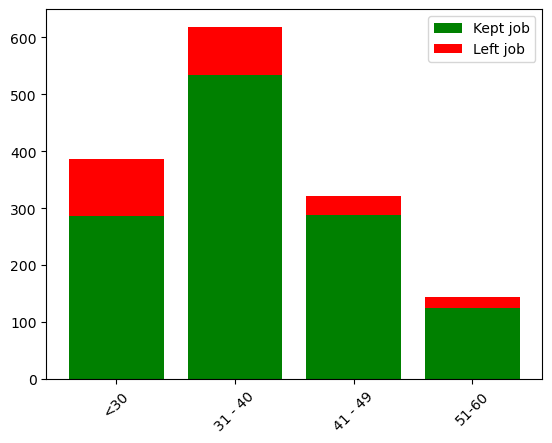

In [77]:
plt.bar(age_list, age_no, color='green')
plt.bar(age_list, age_yes, bottom=age_no, color='red',)
plt.xticks(rotation = 45)


labels = ["Kept job", "Left job"]
plt.legend(labels)

plt.show()

In [78]:
cdf

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Age_groups
0,41,Yes,Sales,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,Yes,8,1,6,0,5,41 - 49
1,49,No,Research & Development,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,No,10,3,10,1,7,41 - 49
2,37,Yes,Research & Development,2,Other,4,Male,92,2,Laboratory Technician,3,Single,Yes,7,3,0,0,0,31 - 40
3,33,No,Research & Development,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,Yes,8,3,8,3,0,31 - 40
4,27,No,Research & Development,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,No,6,3,2,2,2,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2,Medical,3,Male,41,4,Laboratory Technician,4,Married,No,17,3,5,0,3,31 - 40
1466,39,No,Research & Development,1,Medical,4,Male,42,2,Healthcare Representative,1,Married,No,9,3,7,1,7,31 - 40
1467,27,No,Research & Development,3,Life Sciences,2,Male,87,4,Manufacturing Director,2,Married,Yes,6,3,6,0,3,<30
1468,49,No,Sales,3,Medical,4,Male,63,2,Sales Executive,2,Married,No,17,2,9,0,8,41 - 49


In [87]:
job_means = cdf.groupby(["Attrition", 'JobRole']).mean()
job_means = job_means.reset_index()
job_means

,Attrition,JobRole,Age,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,No,Healthcare Representative,39.877049,3.040984,2.819672,66.278689,2.737705,2.786885,13.901639,2.704918,8.188525,2.885246,4.590164
1,No,Human Resources,37.125000,2.850000,2.675000,64.550000,2.775000,2.675000,8.800000,2.925000,5.675000,1.400000,3.675000
2,No,Laboratory Technician,34.944162,2.786802,2.822335,67.091371,2.746193,2.771574,8.142132,2.817259,5.604061,1.548223,3.725888
3,No,Manager,46.783505,3.051546,2.814433,66.432990,2.804124,2.721649,24.701031,2.762887,14.371134,4.835052,6.185567
4,No,Manufacturing Director,38.222222,2.851852,2.940741,64.888889,2.688889,2.688889,12.629630,2.770370,7.518519,2.148148,4.940741
5,No,Research Director,43.858974,3.115385,2.487179,64.371795,2.769231,2.705128,21.141026,2.858974,10.538462,2.910256,6.025641
6,No,Research Scientist,34.567347,2.918367,2.746939,66.457143,2.853061,2.840816,8.020408,2.669388,5.265306,1.440816,3.277551
7,No,Sales Executive,36.758364,3.000000,2.732342,65.955390,2.754647,2.802974,11.104089,2.858736,7.665428,2.360595,4.847584
8,No,Sales Representative,32.060000,2.580000,2.760000,63.700000,2.780000,2.900000,5.460000,2.780000,3.460000,1.360000,2.000000
9,Yes,Healthcare Representative,38.888889,2.333333,2.111111,74.444444,2.666667,2.777778,16.333333,2.666667,10.888889,4.111111,4.333333


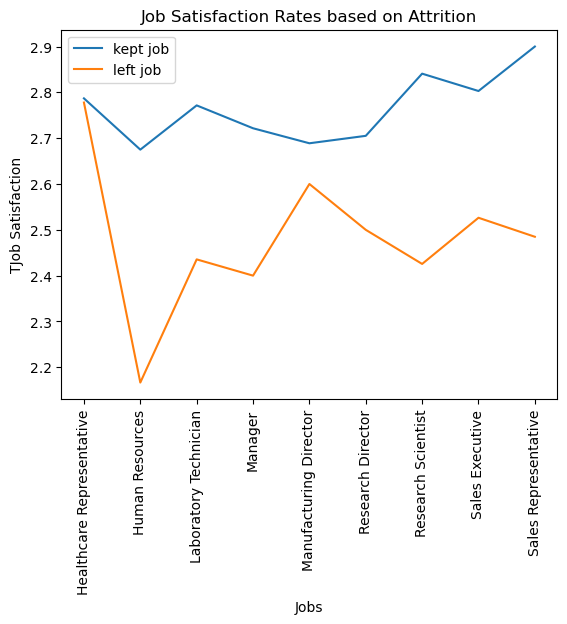

In [104]:
#line plot time to showcase the difference between yes and no 


#get list of Job Roles for the x values

job_list = job_means["JobRole"]
job_list = job_list.drop_duplicates()
job_list = job_list.tolist()
job_list

#get those that didnt leave their job and put into a list

job_no = job_means[job_means['Attrition'].str.contains('No')]
job_no = job_no["JobSatisfaction"]
job_no = job_no.tolist()
job_no

#get those that didnt leave their job and put into a list

job_yes = job_means[job_means['Attrition'].str.contains('Yes')]
job_yes = job_yes["JobSatisfaction"]
job_yes = job_yes.tolist()
job_yes



#plots time

plt.plot(job_list, job_no, label = "kept job")
plt.plot(job_list, job_yes, label = 'left job')
plt.title("Job Satisfaction Rates based on Attrition")
plt.xlabel("Jobs")
plt.ylabel("TJob Satisfaction")
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

In [105]:
cdf

,Age,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Age_groups
0,41,Yes,Sales,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,Yes,8,1,6,0,5,41 - 49
1,49,No,Research & Development,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,No,10,3,10,1,7,41 - 49
2,37,Yes,Research & Development,2,Other,4,Male,92,2,Laboratory Technician,3,Single,Yes,7,3,0,0,0,31 - 40
3,33,No,Research & Development,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,Yes,8,3,8,3,0,31 - 40
4,27,No,Research & Development,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,No,6,3,2,2,2,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,2,Medical,3,Male,41,4,Laboratory Technician,4,Married,No,17,3,5,0,3,31 - 40
1466,39,No,Research & Development,1,Medical,4,Male,42,2,Healthcare Representative,1,Married,No,9,3,7,1,7,31 - 40
1467,27,No,Research & Development,3,Life Sciences,2,Male,87,4,Manufacturing Director,2,Married,Yes,6,3,6,0,3,<30
1468,49,No,Sales,3,Medical,4,Male,63,2,Sales Executive,2,Married,No,17,2,9,0,8,41 - 49


In [108]:
#boxplots for yes vs no for Hourly Rate based on Jobs

job_status = ['Yes', 'No']

hourly = []

for i in job_status:
    hourlywage = cdf.loc[cdf["Attrition"] == i, "HourlyRate"]
    
    hourly.append(hourlywage)

#calculate quantiles




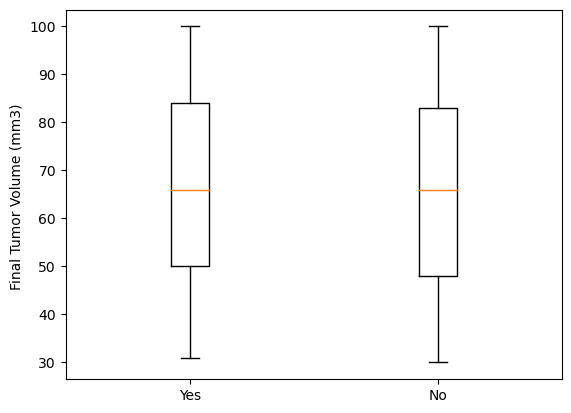

In [110]:
fig1, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3) ")

ax.boxplot(hourly, labels = job_status)
plt.show()




In [ ]:
age_mean = cdf.groupby(["Age_groups"]).mean()

In [ ]:
pop1 = df[df["Attrition"] == "Yes"]
pop2 = df[df["Attrition"] == "No"]

st.ttest_ind(pop1.Age, pop2.Age)

In [ ]:
st.ttest_ind(pop1.Education, pop2.Education)

In [ ]:
st.ttest_ind(pop1.EnvironmentSatisfaction, pop2.EnvironmentSatisfaction)

In [ ]:
st.ttest_ind(pop1.HourlyRate, pop2.HourlyRate)

In [ ]:
st.ttest_ind(pop1.JobInvolvement, pop2.JobInvolvement)

In [ ]:
st.ttest_ind(pop1.JobSatisfaction, pop2.JobSatisfaction)

In [ ]:
st.ttest_ind(pop1.TotalWorkingYears, pop2.TotalWorkingYears)

In [ ]:
st.ttest_ind(pop1.WorkLifeBalance, pop2.WorkLifeBalance)

In [ ]:
st.ttest_ind(pop1.YearsAtCompany, pop2.YearsAtCompany)

In [ ]:
st.ttest_ind(pop1.YearsSinceLastPromotion, pop2.YearsSinceLastPromotion)

In [ ]:
st.ttest_ind(pop1.YearsWithCurrManager, pop2.YearsWithCurrManager)

In [ ]:
# YearswithCurrManager, yearsatCompany, WorkLifeBalance, TotalWorkingYears,JobInvolvement, Age, 

#all these columns are statistically significant 

In [ ]:
#count number of males and females

gender_df= df.groupby('Gender').Attrition.count()
gender_df = gender_df.reset_index()
gender_df

In [ ]:

# make pie-chart

labels = gender_df['Gender']

colors = ["red", "lime"]

gender_pie= gender_df.plot(kind = 'pie', 
           y = "Attrition", 
                           
           autopct = '%1.0f%%', 
           labels = labels,
           colors = colors, 
           startangle = 0)
    


In [ ]:
#count for males,females, based on Attrition


gender1 = df.groupby(['Gender', 'Attrition']).Attrition.count()

gender_att = pd.DataFrame({"Count": gender1})

gender_att.reset_index()

In [ ]:
#split male and females into separate dataFrames

Female_attrition = gender_att.iloc[:2]
Female_attrition = Female_attrition.reset_index()

Female_attrition

Male_attrition = gender_att.iloc[2:]
Male_attrition = Male_attrition.reset_index()

Male_attrition

In [ ]:
#make pie chart for Female attrition rates
labels = Female_attrition["Attrition"]
gender_pie= Female_attrition.plot(kind = 'pie', 
           y = "Count", 
           autopct = '%1.0f%%', 
           labels = labels,
           colors = colors, 
           startangle = 0)

In [100]:
#make pie chart for Female attrition rates
labels = Male_attrition["Attrition"]
gender_pie= Male_attrition.plot(kind = 'pie', 
           y = "Count", 
           autopct = '%1.0f%%', 
           labels = labels,
           colors = colors, 
           startangle = 0)

NameError: name 'Male_attrition' is not defined

In [ ]:
#this point on is attrition based on career 



edu_att = df.groupby(['Attrition','EducationField']).Attrition.count()


edu_att = pd.DataFrame({"Count": edu_att})

edu_att = edu_att.reset_index()

edu_att

In [ ]:
#iloc to seperate no's and yes's

edu_no = edu_att.iloc[:6]
edu_yes = edu_att.iloc[6:]


edu_no

In [ ]:
cdf

In [ ]:
dep_df = cdf.groupby(['Attrition','YearsWithCurrManager']).Attrition.count()
dep_df = pd.DataFrame({'count':dep_df})
dep_df = dep_df.reset_index()
dep_df

In [ ]:
#seperate out rows for yes and no 

dep_no = dep_df.iloc[:18]
dep_yes = dep_df.iloc[18:]


dep_yes.reset_index()
dep_yes

